In [8]:
import argparse
from ray.tune import Analysis
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [23]:
#logdir = '.'
#print(os.getcwd())

logdir = '/home/jovyan/have-deepsky/scripts/output/expr_20210908_130924/PPO_DockingEnv_85b41_00000_0_2021-09-08_13-09-26/'

In [24]:

def get_succ_rate(expr_path):
    """
    The percent of cases that the control system successfully performs a mission.

    From: Safe Autononmy Metrics by Dr. Kerianne Hobbs
    """
    data = pd.read_csv(expr_path + '/progress.csv')
    if len(data.columns) > 70: # some do not have custom metrics available
        success_mean_index = [i for i, j in enumerate(data.columns)
                           if "success_mean" in j][0]
        return data.iloc[-1, success_mean_index]*100
    else:
        return float('nan')

In [33]:

def get_success_mean_col(data):
    return data['custom_metrics/outcome/success_mean']

def get_eps_len_mean(data):
    return data['episode_len_mean']


In [34]:

def get_ep_length(expr_path):
    """
    The average time in seconds (or timesteps) required to successfully complete the
    task (an episode).

    From: Safe Autonomy Metrics by Dr. Kerianne Hobbs
    """
    data = pd.read_csv(expr_path + '/progress.csv')
    return data['episode_len_mean']


In [44]:
data

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-18.655563,-112.144283,-54.811400,2001.000000,20,20,40020,False,20,1,...,3.3,0.20000,0.00005,0.448223,-0.011958,0.457934,0.866522,0.011235,4.784349,0.0
1,-16.246107,-112.144283,-41.091246,2001.000000,20,20,80040,False,40,2,...,3.3,0.20000,0.00005,0.354184,-0.011222,0.362872,0.658825,0.012672,4.774849,0.0
2,-4.756358,-112.144283,-33.605733,1981.216667,20,20,118873,False,60,3,...,3.3,0.20000,0.00005,0.442427,-0.008721,0.448855,0.236959,0.011465,4.770402,0.0
3,-4.756358,-112.144283,-29.522092,1986.162500,20,20,158893,False,80,4,...,3.3,0.20000,0.00005,0.416564,-0.006365,0.421028,0.197994,0.009504,4.762217,0.0
4,-4.756358,-112.144283,-26.698486,1980.370000,20,20,198037,False,100,5,...,3.3,0.20000,0.00005,0.436671,-0.007244,0.441840,0.146309,0.010373,4.755604,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.495959,-0.715093,5.067938,87.020000,59,20,15459375,False,89511,1996,...,4.1,0.50625,0.00005,0.320059,-0.039751,0.353649,0.675947,0.012169,1.722290,0.0
1996,5.495959,-0.879340,5.053289,87.450000,60,20,15464614,False,89571,1997,...,4.1,0.50625,0.00005,0.237327,-0.030333,0.262009,0.795310,0.011163,1.841424,0.0
1997,5.516521,-0.879340,5.047054,87.050000,60,20,15469803,False,89631,1998,...,4.1,0.50625,0.00005,0.145591,-0.027024,0.167639,0.800470,0.009829,1.774796,0.0
1998,5.516521,5.107319,5.295187,86.190000,60,20,15475010,False,89691,1999,...,4.1,0.50625,0.00005,-0.017107,-0.034105,0.011288,0.978471,0.011280,1.732549,0.0


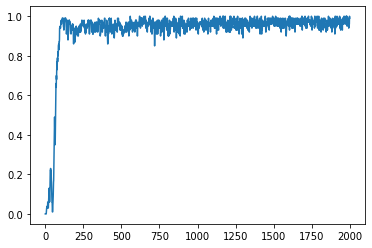

In [45]:

    #args = get_args()
    #success_rate = get_succ_rate(args.logdir)

    data = pd.read_csv(logdir + '/progress.csv')

    success_mean_data = get_success_mean_col(data)
    plt.figure()
    plt.plot(success_mean_data)

In [46]:
data.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'custom_metrics/outcome/success_mean',
       'custom_metrics/outcome/success_min',
       'custom_metrics/outcome/success_max',
       'custom_metrics/outcome/failure_mean',
       'custom_metrics/outcome/failure_min',
       'custom_metrics/outcome/failure_max',
       'custom_metrics/failure_code_ratio/timeout_mean',
       'custom_metrics/failure_code_ratio/timeout_min',
       'custom_metrics/failure_code_ratio/timeout_max',
       'custom_metrics/failure_code_ratio/distance_mean',
       'custom_metrics/failure_code_ratio/distance_min',
       'cu

In [47]:
data['custom_metrics/outcome/success_mean']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
1995    0.96
1996    0.96
1997    0.96
1998    1.00
1999    0.99
Name: custom_metrics/outcome/success_mean, Length: 2000, dtype: float64

In [48]:
data.shape

(2000, 84)

In [49]:
data.iloc[0]['custom_metrics/outcome/success_mean']

0.0

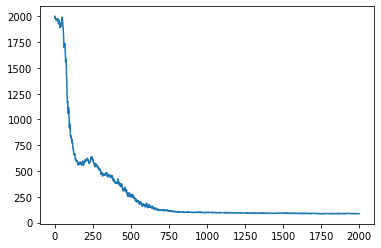

In [50]:
data = pd.read_csv(logdir + '/progress.csv')
eps_len_data = get_eps_len_mean(data)
plt.figure()
plt.plot(eps_len_data)

In [51]:
data

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,perf/ram_util_percent,info/learner/default_policy/cur_kl_coeff,info/learner/default_policy/cur_lr,info/learner/default_policy/total_loss,info/learner/default_policy/policy_loss,info/learner/default_policy/vf_loss,info/learner/default_policy/vf_explained_var,info/learner/default_policy/kl,info/learner/default_policy/entropy,info/learner/default_policy/entropy_coeff
0,-18.655563,-112.144283,-54.811400,2001.000000,20,20,40020,False,20,1,...,3.3,0.20000,0.00005,0.448223,-0.011958,0.457934,0.866522,0.011235,4.784349,0.0
1,-16.246107,-112.144283,-41.091246,2001.000000,20,20,80040,False,40,2,...,3.3,0.20000,0.00005,0.354184,-0.011222,0.362872,0.658825,0.012672,4.774849,0.0
2,-4.756358,-112.144283,-33.605733,1981.216667,20,20,118873,False,60,3,...,3.3,0.20000,0.00005,0.442427,-0.008721,0.448855,0.236959,0.011465,4.770402,0.0
3,-4.756358,-112.144283,-29.522092,1986.162500,20,20,158893,False,80,4,...,3.3,0.20000,0.00005,0.416564,-0.006365,0.421028,0.197994,0.009504,4.762217,0.0
4,-4.756358,-112.144283,-26.698486,1980.370000,20,20,198037,False,100,5,...,3.3,0.20000,0.00005,0.436671,-0.007244,0.441840,0.146309,0.010373,4.755604,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.495959,-0.715093,5.067938,87.020000,59,20,15459375,False,89511,1996,...,4.1,0.50625,0.00005,0.320059,-0.039751,0.353649,0.675947,0.012169,1.722290,0.0
1996,5.495959,-0.879340,5.053289,87.450000,60,20,15464614,False,89571,1997,...,4.1,0.50625,0.00005,0.237327,-0.030333,0.262009,0.795310,0.011163,1.841424,0.0
1997,5.516521,-0.879340,5.047054,87.050000,60,20,15469803,False,89631,1998,...,4.1,0.50625,0.00005,0.145591,-0.027024,0.167639,0.800470,0.009829,1.774796,0.0
1998,5.516521,5.107319,5.295187,86.190000,60,20,15475010,False,89691,1999,...,4.1,0.50625,0.00005,-0.017107,-0.034105,0.011288,0.978471,0.011280,1.732549,0.0


In [40]:
data['timesteps_total']

0          40020
1          80040
2         118873
3         158893
4         198037
          ...   
1995    15459375
1996    15464614
1997    15469803
1998    15475010
1999    15480275
Name: timesteps_total, Length: 2000, dtype: int64

In [65]:
steps = data['timesteps_total']
success_mean= data['custom_metrics/outcome/success_mean']


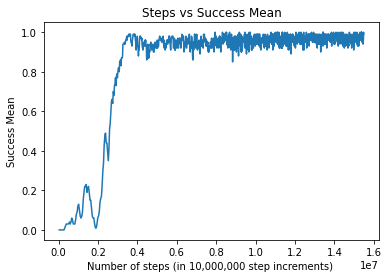

In [71]:
plt.figure()
plt.title('Steps vs Success Mean')
plt.ylabel('Success Mean')
plt.xlabel('Number of steps')
plt.plot(steps,success_mean)

In [72]:
steps = data['timesteps_total']
episodes_len_mean= data['episode_len_mean']

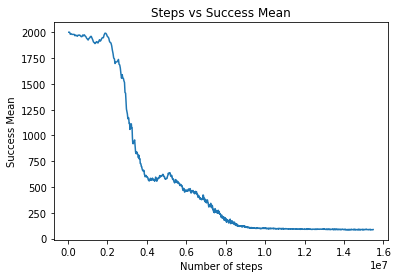

In [74]:
plt.figure()
plt.title('Steps vs Episode Mean length')
plt.ylabel('Episode Mean Length')
plt.xlabel('Number of steps')
plt.plot(steps,episodes_len_mean)